<h1 style="color: violet;">Data Analysis on Electric Vehicle:</h1>

<h2>Exploratory Data Analysis (Univariate)</h2>

Numerical Summary:
          Model Year  Electric Range      Base MSRP
count  112634.000000   112634.000000  112634.000000
mean     2019.003365       87.812987    1793.439681
std         2.892364      102.334216   10783.753486
min      1997.000000        0.000000       0.000000
25%      2017.000000        0.000000       0.000000
50%      2020.000000       32.000000       0.000000
75%      2022.000000      208.000000       0.000000
max      2023.000000      337.000000  845000.000000

Top 5 Categorical Distributions:
Make       Electric Vehicle Type                   Clean Alternative Fuel Vehicle (CAFV) Eligibility           
TESLA      Battery Electric Vehicle (BEV)          Eligibility unknown as battery range has not been researched    26466
                                                   Clean Alternative Fuel Vehicle Eligible                         25612
NISSAN     Battery Electric Vehicle (BEV)          Clean Alternative Fuel Vehicle Eligible                         11175
CHEV

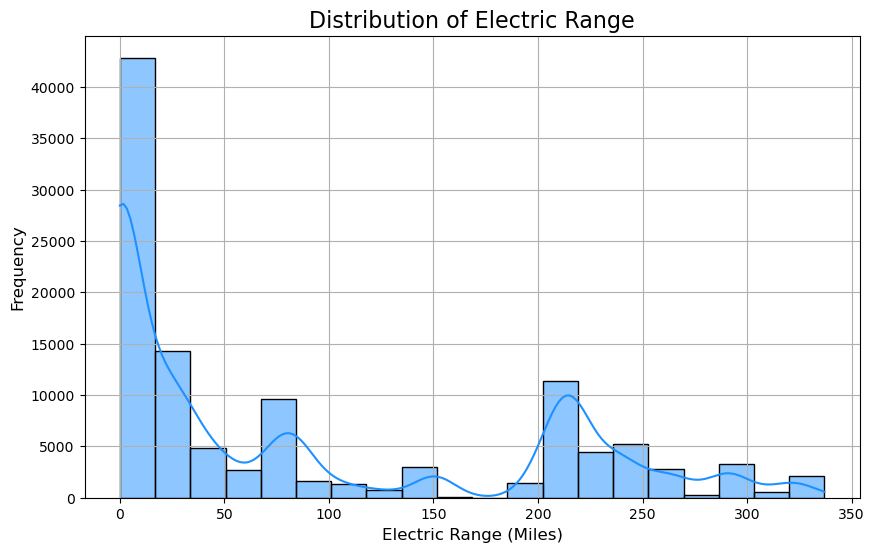

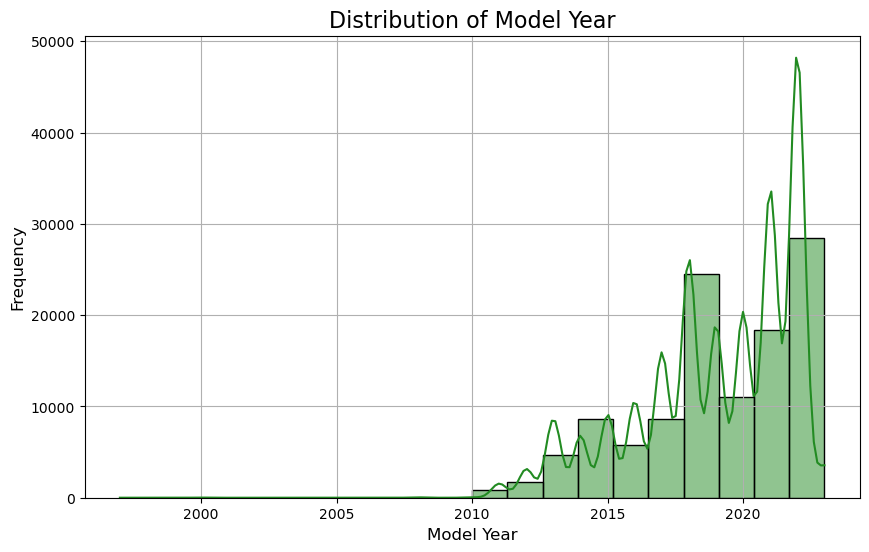

C:\Users\ladis\AppData\Local\Temp\ipykernel_13780\4266872727.py:39: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




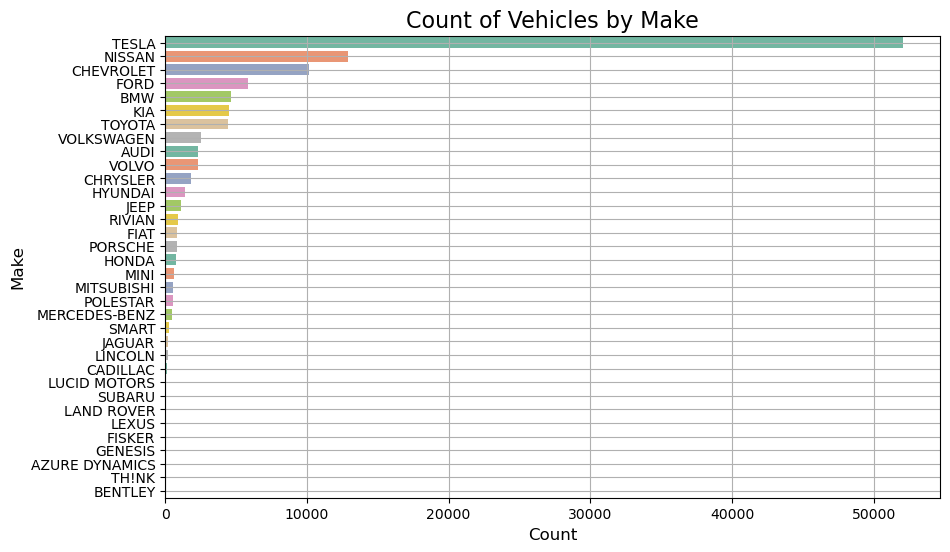

In [4]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path=  r'C:\Users\ladis\Downloads\dataset.csv' # Replace with the correct path
data = pd.read_csv(file_path)

# Summary statistics for numerical columns
numerical_summary = data[['Model Year', 'Electric Range', 'Base MSRP']].describe()
print("Numerical Summary:")
print(numerical_summary)

# Categorical variable distributions
categorical_summary = data[['Make', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility']].value_counts()
print("\nTop 5 Categorical Distributions:")
print(categorical_summary.head())

# Univariate analysis for Electric Range with color
plt.figure(figsize=(10, 6))
sns.histplot(data['Electric Range'], bins=20, kde=True, color='dodgerblue')  # Use a vibrant color
plt.title('Distribution of Electric Range', fontsize=16)
plt.xlabel('Electric Range (Miles)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

# Univariate analysis for Model Year with color
plt.figure(figsize=(10, 6))
sns.histplot(data['Model Year'], bins=20, kde=True, color='forestgreen')  # Use a vibrant color
plt.title('Distribution of Model Year', fontsize=16)
plt.xlabel('Model Year', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

# Univariate analysis for Make with color
plt.figure(figsize=(10, 6))
sns.countplot(y='Make', data=data, order=data['Make'].value_counts().index, palette='Set2')  # Use colorful palette
plt.title('Count of Vehicles by Make', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Make', fontsize=12)
plt.grid(True)
plt.show()


<h2>Exploratory Data Analysis (Bivariate)</h2>

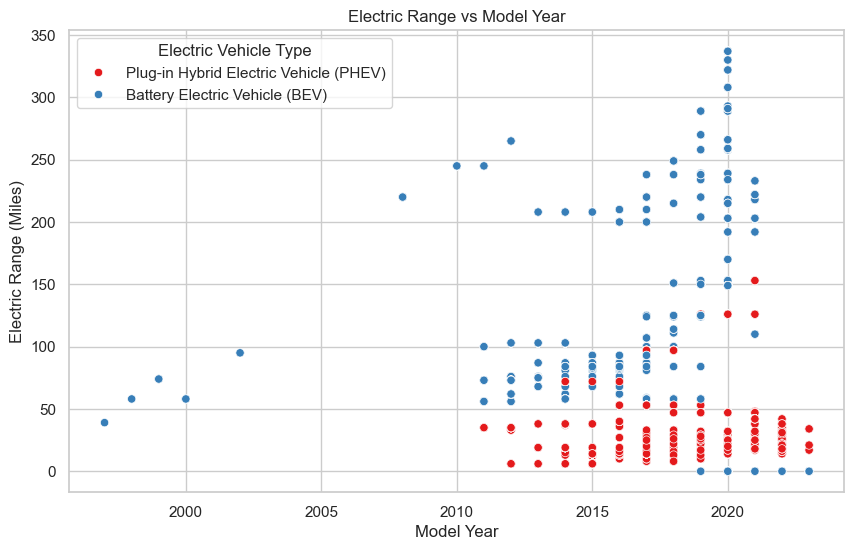

C:\Users\ladis\AppData\Local\Temp\ipykernel_2664\3159496434.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Make', y='Electric Range', data=data, palette='Set2')


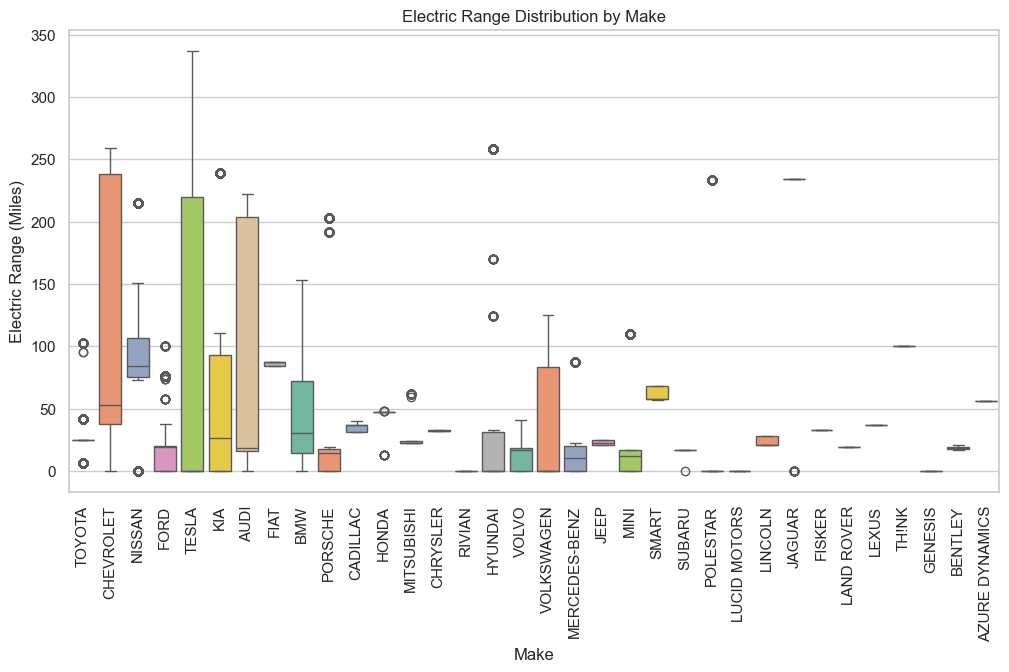

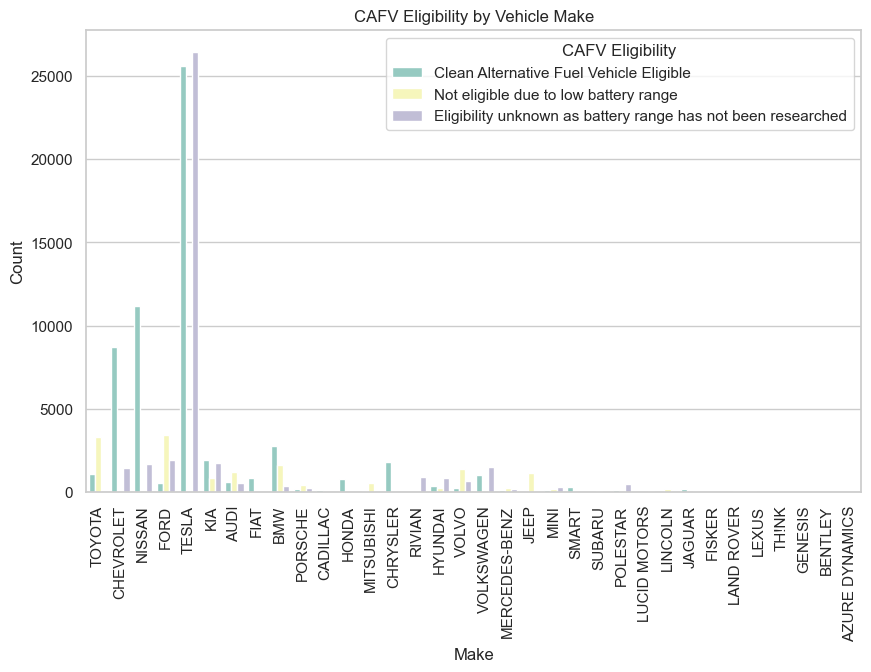

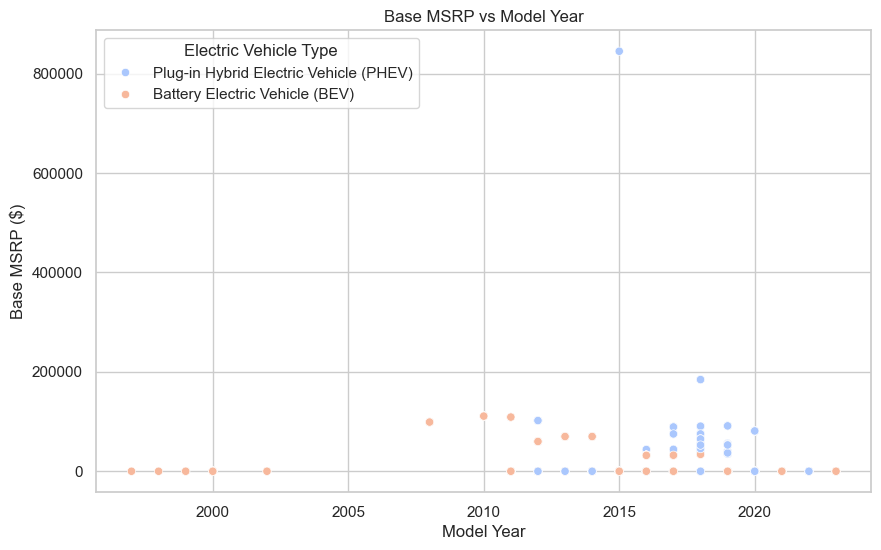

C:\Users\ladis\AppData\Local\Temp\ipykernel_2664\3159496434.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Clean Alternative Fuel Vehicle (CAFV) Eligibility', y='Electric Range', data=data, palette='Set1')


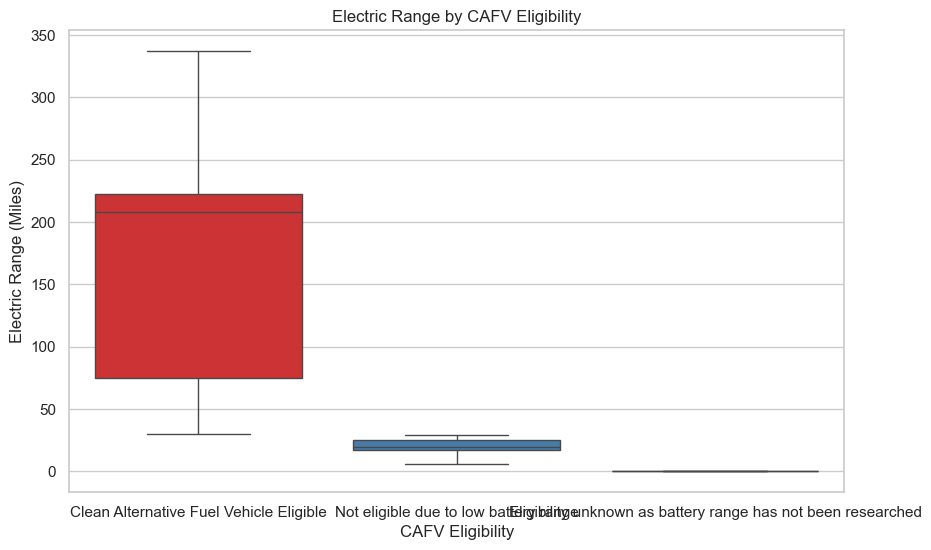

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r'C:\Users\ladis\Downloads\dataset.csv' # Replace with the correct path
data = pd.read_csv(file_path)

# Set plot aesthetics
sns.set(style="whitegrid")

# Bivariate Analysis 1: Electric Range vs Model Year
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Model Year', y='Electric Range', data=data, hue='Electric Vehicle Type', palette='Set1')
plt.title('Electric Range vs Model Year')
plt.xlabel('Model Year')
plt.ylabel('Electric Range (Miles)')
plt.legend(title='Electric Vehicle Type')
plt.show()

# Bivariate Analysis 2: Make vs Electric Range
plt.figure(figsize=(12, 6))
sns.boxplot(x='Make', y='Electric Range', data=data, palette='Set2')
plt.xticks(rotation=90)
plt.title('Electric Range Distribution by Make')
plt.xlabel('Make')
plt.ylabel('Electric Range (Miles)')
plt.show()

# Bivariate Analysis 3: Make vs CAFV Eligibility (colored by Electric Vehicle Type)
plt.figure(figsize=(10, 6))
sns.countplot(x='Make', hue='Clean Alternative Fuel Vehicle (CAFV) Eligibility', data=data, palette='Set3')
plt.xticks(rotation=90)
plt.title('CAFV Eligibility by Vehicle Make')
plt.xlabel('Make')
plt.ylabel('Count')
plt.legend(title='CAFV Eligibility')
plt.show()

# Bivariate Analysis 4: Model Year vs Base MSRP (colored by Electric Vehicle Type)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Model Year', y='Base MSRP', data=data, hue='Electric Vehicle Type', palette='coolwarm')
plt.title('Base MSRP vs Model Year')
plt.xlabel('Model Year')
plt.ylabel('Base MSRP ($)')
plt.legend(title='Electric Vehicle Type')
plt.show()

# Bivariate Analysis 5: Electric Range vs CAFV Eligibility (colored by Make)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Clean Alternative Fuel Vehicle (CAFV) Eligibility', y='Electric Range', data=data, palette='Set1')
plt.title('Electric Range by CAFV Eligibility')
plt.xlabel('CAFV Eligibility')
plt.ylabel('Electric Range (Miles)')
plt.show()

# Optional: Adjust color palettes and plot sizes as needed


<h2>Creating a Choropleth using plotly.express to display the number of EV vehicles based on location.</h2>

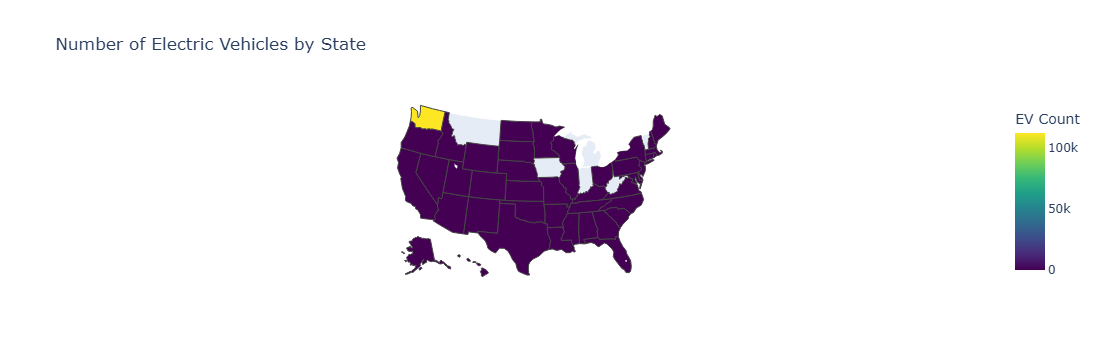

In [9]:
import pandas as pd
import plotly.express as px

# Load the dataset
file_path = r'C:\Users\ladis\Downloads\dataset.csv'  # Replace with the correct path
data = pd.read_csv(file_path)

# Grouping the data by 'State' to count the number of EVs per state
ev_count_by_state = data.groupby('State').size().reset_index(name='EV Count')

# Create the choropleth map
fig = px.choropleth(ev_count_by_state, 
                    locations='State',  # State column
                    locationmode="USA-states",  # Using USA state mode
                    color='EV Count',  # The number of EVs
                    hover_name='State',  # Display state name when hovering
                    color_continuous_scale='Viridis',  # Color scale
                    scope="usa",  # Focus on the USA
                    title='Number of Electric Vehicles by State')

# Show the plot
fig.show()


<h2>Creating a Racing Bar Plot to display the animation of EV Make and its count each year.</h2>

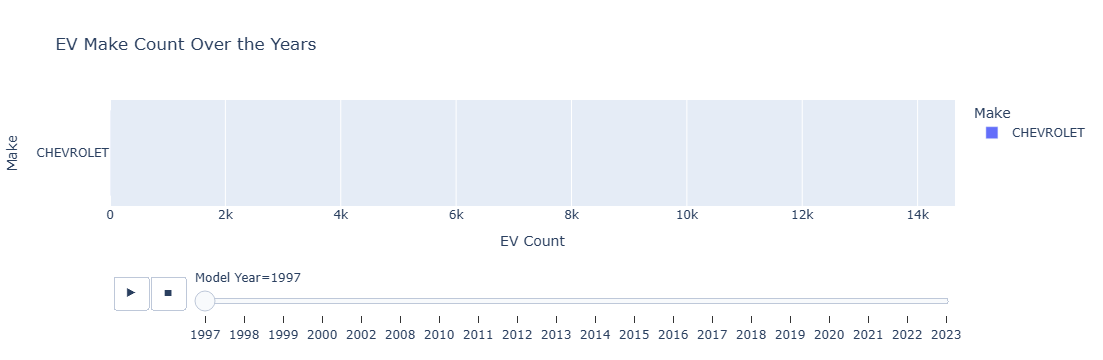

In [2]:
import pandas as pd
import plotly.express as px

# Load the dataset
file_path = r'C:\Users\ladis\Downloads\dataset.csv'   # Replace with your file path
data = pd.read_csv(file_path)

# Group by 'Model Year' and 'Make' to get the count of vehicles each year
ev_make_year_count = data.groupby(['Model Year', 'Make']).size().reset_index(name='EV Count')

# Create a racing bar plot
fig = px.bar(ev_make_year_count, 
             x='EV Count', 
             y='Make', 
             color='Make', 
             orientation='h',  # Horizontal bar plot
             animation_frame='Model Year',  # Animation over 'Model Year'
             range_x=[0, ev_make_year_count['EV Count'].max() + 100],  # Setting range for x-axis
             title='EV Make Count Over the Years')

# Show the animated plot
fig.show()
